In [2]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
#Importing the file and subsetting the column that i am in charge of
from itertools import count
df2 = pd.read_csv('/content/IDs_mapping.csv')
df = pd.read_csv('/content/readmission.csv')
my_med = df.loc[:,'nateglinide':'pioglitazone']
my_med.head()

,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone
0,No,No,No,No,No,No,No,No
1,No,No,No,No,No,No,No,No
2,No,No,No,No,Steady,No,No,No
3,No,No,No,No,No,No,No,No
4,No,No,No,No,Steady,No,No,No


In [6]:
#Check the values to find how many Null
print(my_med.isnull().sum())

nateglinide       0
chlorpropamide    0
glimepiride       0
acetohexamide     0
glipizide         0
glyburide         0
tolbutamide       0
pioglitazone      0
dtype: int64


In [ ]:
#Find the unique values
my_med['nateglinide'].unique()

array(['No', 'Steady', 'Down', 'Up'], dtype=object)

In [8]:
#Converting the 'No' cells into '0' and the other ones into '1' and find how many values are different than 'No'
my_med.replace({'No': 0,'Steady':1,'Up':1,'Down': 1}, inplace=True)
my_med.sum()

nateglinide         703
chlorpropamide       86
glimepiride        5191
acetohexamide         1
glipizide         12686
glyburide         10650
tolbutamide          23
pioglitazone       7328
dtype: int64

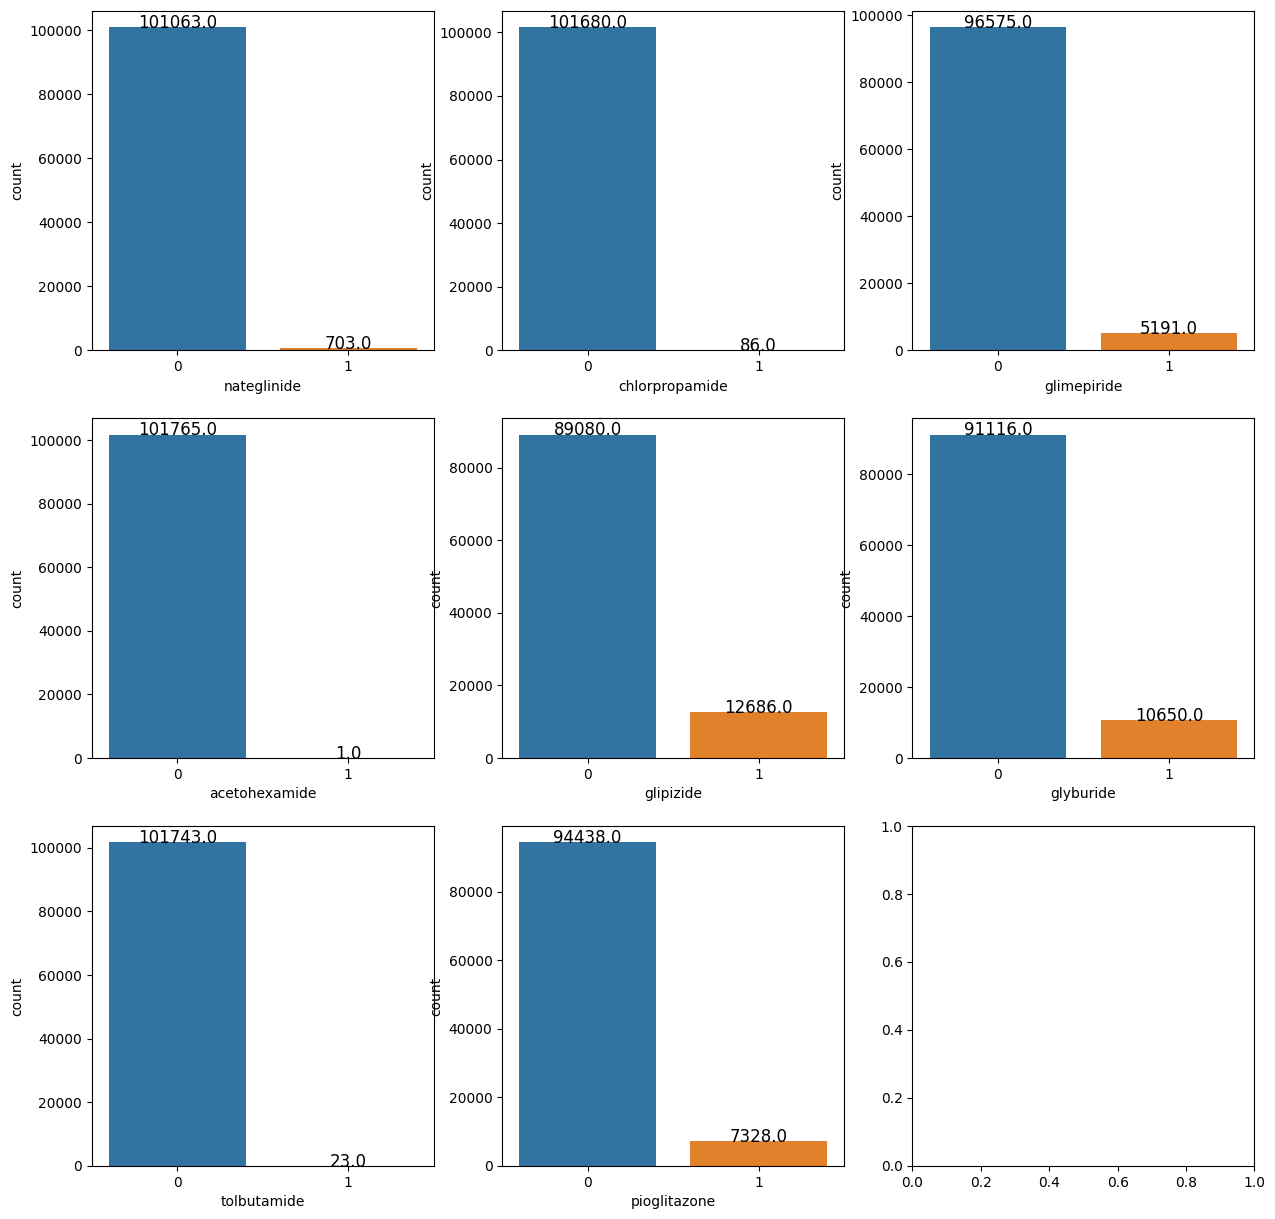

In [11]:
#Plotting the count to have a better understanding
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

a=0
b=0

for i in my_med.columns:
  ax=axes[a,b]
  sns.countplot(data=my_med, x=i, ax=ax, order=[0, 1])
  for p in ax.patches: #This cycle is for getting the value count on top of the bar chart
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=12, color='black', xytext=(0, 3),
                    textcoords='offset points')
  if b>=2:
    b=0
    a+=1
  else:
    b+=1

plt.show()

In [18]:
#Find percentage of prescription for every medicine and find those with less than 0.1%, labelling them wiht 'Yes'
print('nateglinide use is' , round(my_med['nateglinide'].sum()/len(my_med['nateglinide'])*100, 4), '%')
print('chlorpropamide use is' , round(my_med['chlorpropamide'].sum()/len(my_med['chlorpropamide'])*100, 4), '%') #Yes
print('glimepiride use is' , round(my_med['glimepiride'].sum()/len(my_med['glimepiride'])*100, 4), '%')
print('acetohexamide use is' , round(my_med['acetohexamide'].sum()/len(my_med['acetohexamide'])*100, 4), '%') #Yes
print('glipizide use is' , round(my_med['glipizide'].sum()/len(my_med['glipizide'])*100, 4), '%')
print('glyburide use is' , round(my_med['glyburide'].sum()/len(my_med['glyburide'])*100, 4), '%')
print('tolbutamide use is' , round(my_med['tolbutamide'].sum()/len(my_med['tolbutamide'])*100, 4), '%') #Yes
print('pioglitazone use is' , round(my_med['pioglitazone'].sum()/len(my_med['pioglitazone'])*100, 4), '%')


nateglinide use is 0.6908 %
chlorpropamide use is 0.0845 %
glimepiride use is 5.1009 %
acetohexamide use is 0.001 %
glipizide use is 12.4659 %
glyburide use is 10.4652 %
tolbutamide use is 0.0226 %
pioglitazone use is 7.2008 %
